# What is Jupyter?

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/38/Jupyter_logo.svg/800px-Jupyter_logo.svg.png" width=200/>

[Jupyter](https://en.wikipedia.org/wiki/Project_Jupyter) is a project for interactive data science created by Colombian physicist [Fernando Pérez](https://en.wikipedia.org/wiki/Fernando_P%C3%A9rez_(software_developer)).

The idea of Jupyter is to interactively execute [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) and other programming languages like  [Julia](https://en.wikipedia.org/wiki/Julia_(programming_language)) and [R](https://en.wikipedia.org/wiki/R_(programming_language)).

This course focuses on Python only.

Jupyter combines code with documentation and interactive visualization.

---

# Executing cells

Cells can be executed by pressing SHIFT + ENTER, or by using the Run <span>&#9658;</span> button.

**HINT:** 

Double-click on the documentation cells to edit them or see how they are implemented.

---

# Types of cells

**HINT:**

Type `v` to switch cells into code cells, and `m` to switch cells into Markdown. Or use the `Cell` menu.

## Code cells

By default, cells contain Python code as illustrated in the following examples:

In [1]:
5 + 3

8

In [2]:
capitals_dictionary = {'Colombia': 'Bogota', 'Peru': 'Lima', 'Lithuania': 'Vilnius'}

for country in capitals_dictionary:
    print(f"The capital of {country} is {capitals_dictionary[country]}")

The capital of Colombia is Bogota
The capital of Peru is Lima
The capital of Lithuania is Vilnius


In [3]:
def cube(x):
    return x**3

cube(3.3)

35.937

## Documentation cells

Cells can also contain HTML, Markdown, $\LaTeX$, and any combination of them.

###  Markdown:

* 100g pancetta
* 50g pecorino cheese
* 50g parmesan
* 3 large eggs



### HTML

<span>Python</span> is a really cool programming language. 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/800px-Python-logo-notext.svg.png" width=100/>

### LaTeX

#### Maxwell Equations

\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

One can also have inline $\LaTeX$: $\alpha=\frac{\beta}{2}$ is the formula for ...

---

# Visualization

## matplotlib

There are very many libraries for data visualization. Here we introduce a few ones.


[matplotlib](https://matplotlib.org/) is the *de facto* visualization library.

Examples can be found [here](https://matplotlib.org/stable/gallery/index.html).

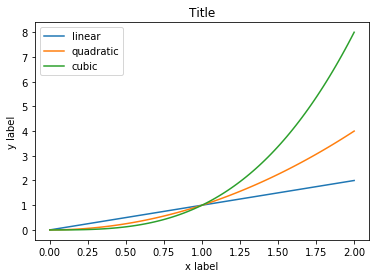

In [2]:

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Title")
plt.legend()


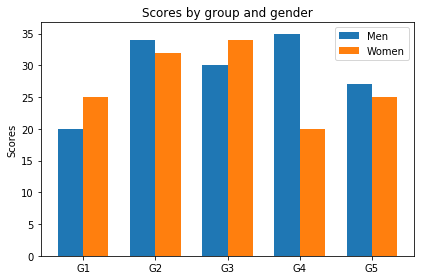

In [3]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

## seaborn

[seaborn](https://seaborn.pydata.org/) is a library for statistical data visualization.

Examples can be found [here](https://seaborn.pydata.org/examples/index.html).



In [1]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

AttributeError: module 'seaborn' has no attribute 'set_theme'

# Interactive visualizations

## bokeh

[bokeh](https://bokeh.org/) is a library for interactive visualizations.


In [5]:
Amplitude: 1
Frequency: 1
Phase: 0
Offset: 0
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, show
from bokeh.io import output_notebook

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), width=400, height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (let i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_notebook()
show(layout)

Loading BokehJS ...

# Interactive help

It is possible to check the *docstrings* documentation of a module by appending a question mark `'?'` to the function of interest.

```Python
function_name?
```

For instance, let's assume you are interested in checking what the `groupby` method in `Pandas` does:

In [6]:
import pandas as pd
pd.DataFrame.groupby?

In [8]:
# this also applies to your own code:

def my_function(x, y):
    """ This function returns the max value between x and y
    
    x, y: are floats
    returns max(x,y)
    """
    return max(x,y)

my_function?

# Further reading

There is plenty of online documentation and free courses.